### Multiple Linear Regression: Predicting King County, WA, Housing Prices
This project is based on the work of David Bartholomew.
https://medium.com/swlh/multiple-linear-regression-in-python-king-county-housing-data-beef1c3982a1

 - This interpretation seeks to improve upon David's work by transforming and selecting/excluding variables.
 
 
#### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [88]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

In [89]:
#Import and preview the data
df = pd.read_csv('kc_house_data.csv')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [90]:
#Preview data statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [91]:
#Drop id column as it isn't relevant for our analysis
df.drop(columns=['id'], axis=1, inplace=True)

In [92]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [93]:
#Find missing values
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [94]:
# df.waterfront.value_counts()

In [95]:
#Fill missing values for waterfront
df.waterfront.fillna(0.0, inplace=True)

In [96]:
# df.view.value_counts()

In [97]:
df.view.fillna(0.0, inplace=True)

In [98]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
875.0         1
1930.0        1
784.0         1
1281.0        1
1245.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [99]:
df['sqft_basement'] = df.sqft_basement.replace('?', 0.0)
df.sqft_basement.value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
906.0         1
1930.0        1
875.0         1
1960.0        1
1245.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [100]:
#Convert sqft_basement to float
df['sqft_basement']= df.sqft_basement.astype('float64')

In [101]:
#Convert date column to 2 separate columns for month and year
date = df['date'].str.split('/', expand=True)
df['month_sold'] = date[0].astype('float64')
df['year_sold'] = date[2].astype('float64')

#Drop original date column
df.drop(columns=['date'], axis=1, inplace=True)

In [102]:
#Convert year_built to age
df['age'] = 2015 - df.yr_built
df = df.drop(columns=['yr_built'], axis=1)

In [103]:
#Fill missing values
df.yr_renovated.fillna(0.0, inplace=True)

In [104]:
#Create renovated column
df['renovated'] = df.year_sold - df.yr_renovated

In [105]:
#Replace any values less than 10 with 1, and any values over 10 with 0
renovated = df.renovated.values
age = df.age.values
values = np.where(renovated <= 10, 1, 0)
df['renovated'] = np.where(age <= 5, 1, values)

#Drop yr_renovated column
df.drop(columns=['yr_renovated'], axis=1, inplace=True)

To no surprise, it seems that homes that are closer to downtown Seattle are higher priced, and prices tend to go down the further away from the city. Using the geopy library, we will create a column that calculates the distance in miles from Seattle and include this in our model.

In [106]:
from geopy import distance

lat_long = df['lat'].astype(str) + ',' + df['long'].astype(str)
lat_long = list(map(eval, lat_long)) 

Seattle = (47.6062, -122.3321)
miles = []
for i in lat_long:
    miles.append(round(distance.distance(i, Seattle).miles, 1))
df['distance'] = miles

In [107]:
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'month_sold', 'year_sold', 'age', 'renovated',
       'distance']]

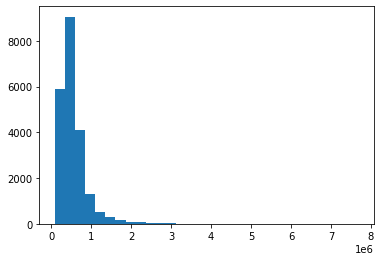

In [108]:
# sns.distplot(df['price'], bins=30)
plt.hist(df['price'], bins=30)
plt.show()

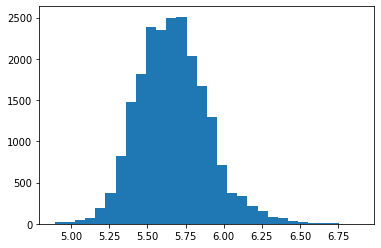

In [109]:
df['log_price'] = np.log10(df['price'])
plt.hist(df['log_price'],bins=30)
plt.show()

In [110]:
df2 = df.drop(['price'], axis=1)

### Using All Features

In [85]:
#Function for linear regression
def linear_model(dataframe):
   
    #Create feature and target columns
    X = dataframe.drop(columns=['log_price'], axis=1)
    y = dataframe.log_price
    
    #Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
    #Fit the model
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    model
    
    #View model accuracy
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('Training Score:', round(train_score, 2))
    print('Test Score:', round(test_score, 2))
    print('Coefficients:', model.coef_)
    
    #VIF
    Z = sm.add_constant(X)
    vif = [variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])]
    vif_dict = dict(zip(X.columns, vif))
    print('VIF:', vif_dict)
        
    #Residuals
    y_pred = linreg.predict(X_test)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.ylabel('residuals')
    plt.xlabel('pred_val')
    plt.show()
    
    #View model summary in statsmodel
    X_train = sm.add_constant(X_train)
    smmodel = sm.OLS(y_train, X_train).fit()
    print(smmodel.summary())
    return smmodel

Training Score: 0.75
Test Score: 0.75
Coefficients: [-6.18172586e-03  2.78919794e-02  4.77549983e-05  2.75953465e-07
  7.00557932e-03  1.76392099e-01  1.73746826e-02  2.96075374e-02
  6.32493319e-02  2.52976754e-05  4.16340546e-06  6.07444855e-05
  2.26321940e-07  9.24162533e-04  2.43868943e-02  8.40791044e-04
  3.95911287e-02 -1.33178585e-02]
VIF: {'bedrooms': 48115336.42576457, 'bathrooms': 1.6468719662005136, 'sqft_living': 3.3145098350338853, 'sqft_lot': 146.8598557395406, 'floors': 2.101520019696073, 'waterfront': 2.051604036670025, 'view': 1.1754613059238759, 'condition': 1.3729729617614481, 'grade': 1.206383424629631, 'sqft_above': 3.462688207778197, 'sqft_basement': 119.35775950715242, 'sqft_living15': 33.07430417160935, 'sqft_lot15': 2.8358821477991003, 'month_sold': 2.1463933615336015, 'year_sold': 2.582586402125743, 'age': 2.5904970008241626, 'renovated': 2.322291616807416, 'distance': 1.1157656417527053}


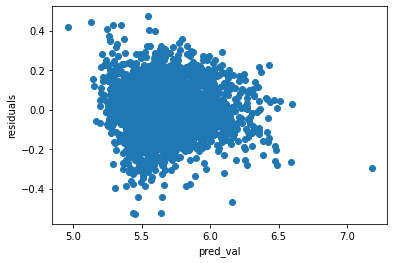

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     2920.
Date:                Wed, 10 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:23:33   Log-Likelihood:                 13024.
No. Observations:               17277   AIC:                        -2.601e+04
Df Residuals:                   17258   BIC:                        -2.586e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -44.2621      6.007     -7.368

In [87]:
model = linear_model(df2)
model

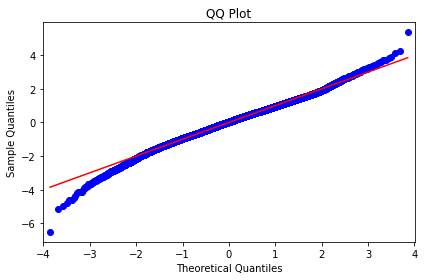

In [32]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='r', fit=True)
plt.title('QQ Plot')
plt.tight_layout()
plt.show()

Checklist
- [ ] Normalization
- [ ] Homoscedasticity
- [ ] Multicolinearity
- [x] Autocorrelation
- [ ] Residual Skewness
- [ ] Kurtosis

<AxesSubplot:>

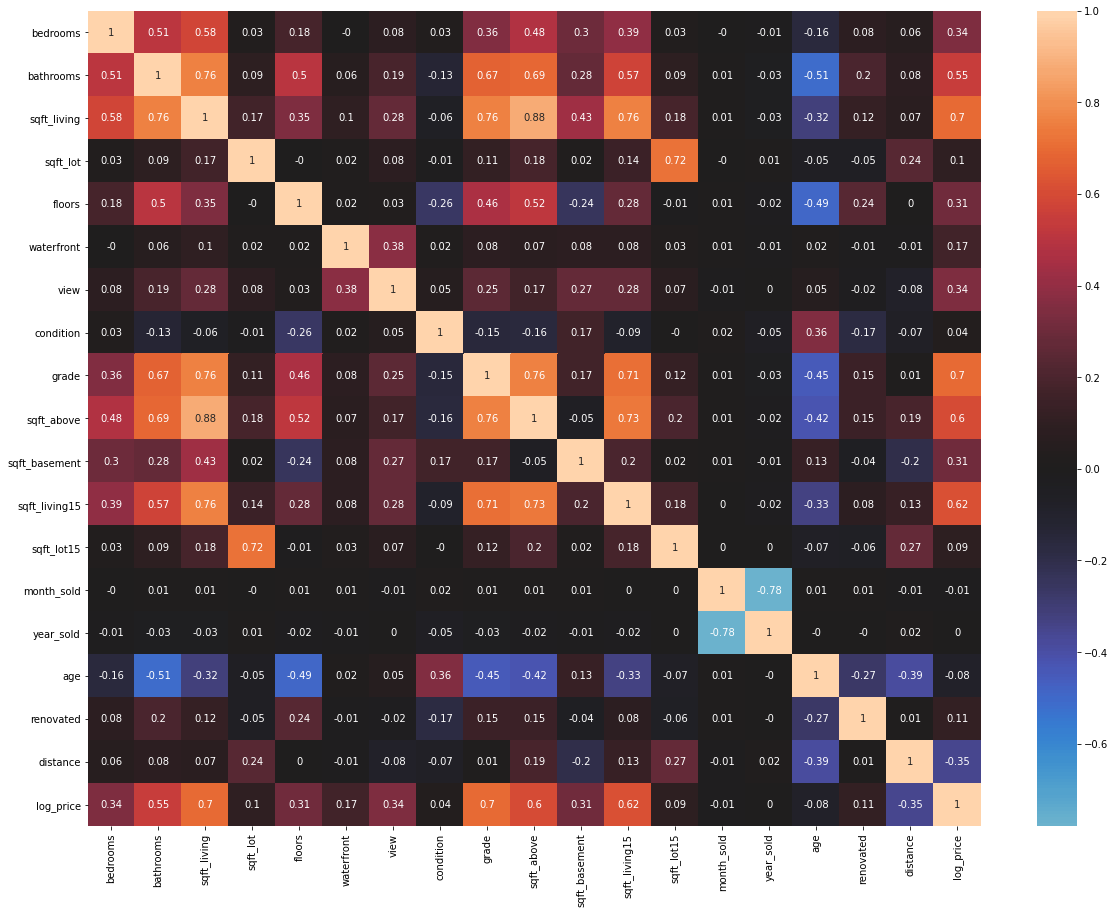

In [33]:
plt.subplots(figsize=(20,15))
sns.heatmap(df2.corr().round(2), annot=True,center=0)

In [34]:
df2.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'month_sold',
       'year_sold', 'age', 'renovated', 'distance', 'log_price'],
      dtype='object')

In [35]:
#Regarding multicolinearity (VIF and heatmap) and weak coefficient variables.
df2 = df.drop(['price','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'month_sold', 'age'], axis=1)


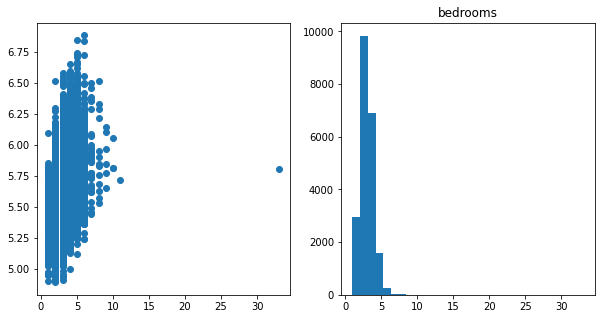

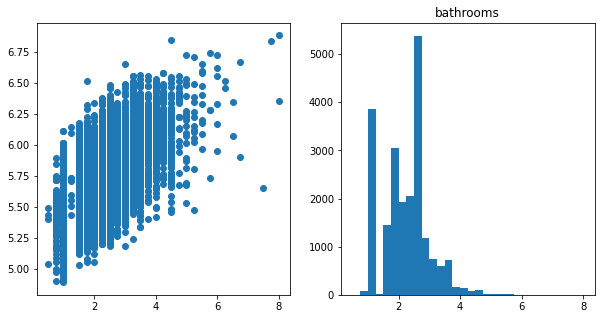

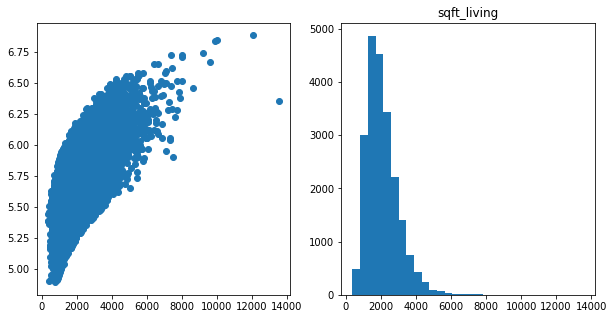

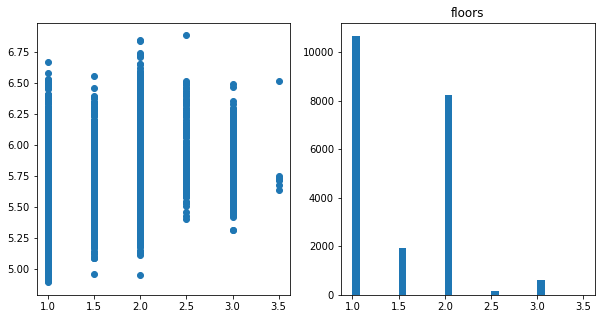

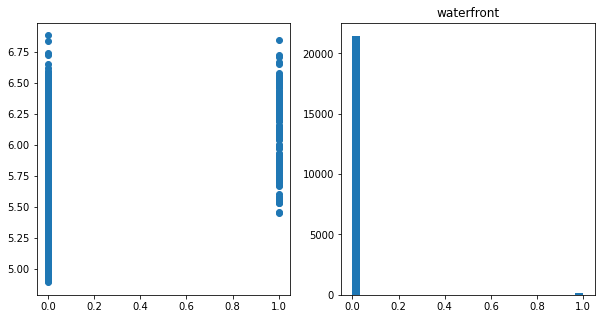

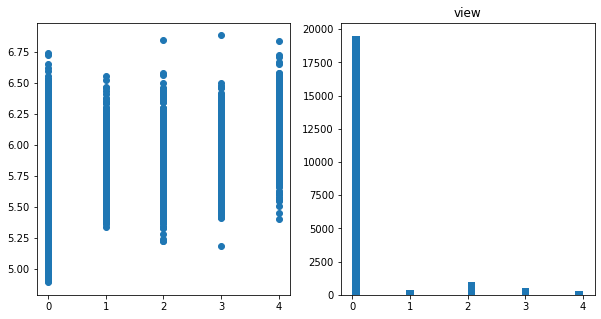

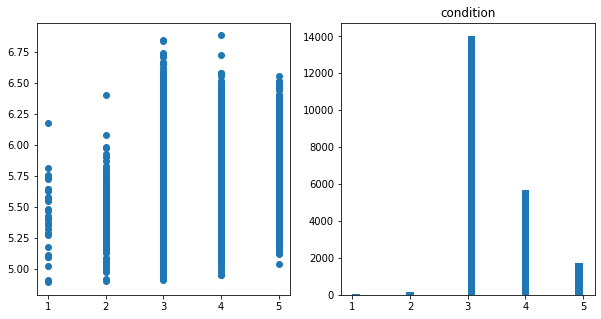

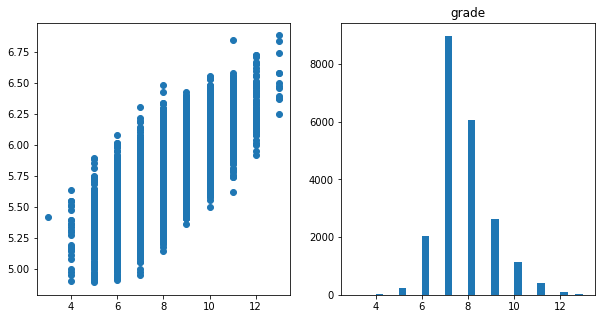

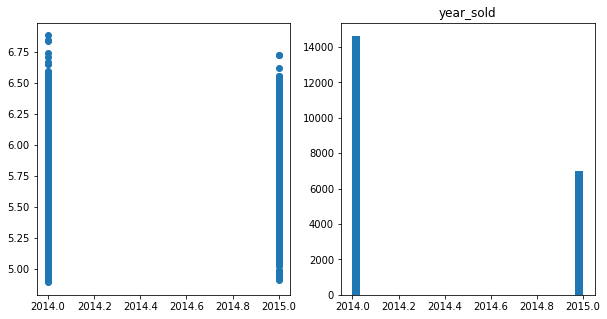

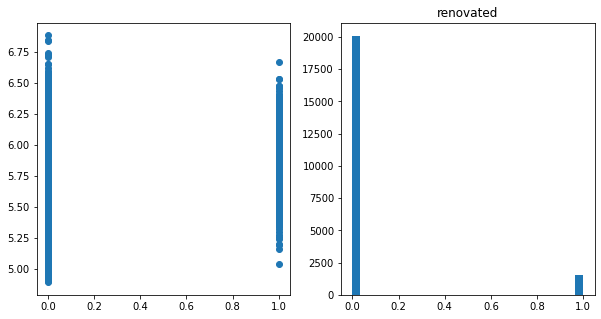

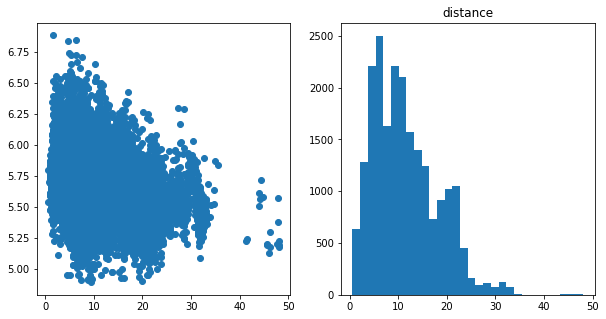

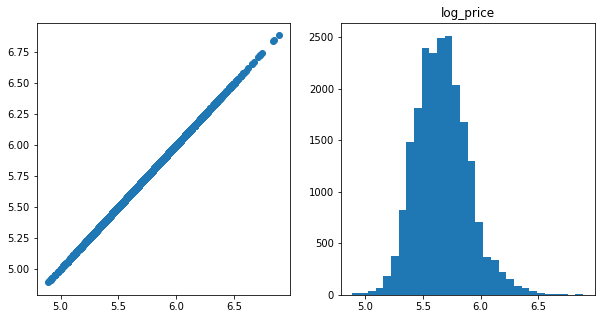

In [36]:
#Normalization
#Preview the relationship between features and target variables
for col in df2.columns:
    x1,y1 = df2[col], df2.log_price
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    plt.title(col)
    ax1.scatter(x1,y1)
    ax2.hist(x1, bins=30)
#     plt.tight_layout()

In [111]:
#transform independ data to normalized
#dropping outlier of bathroom > 10
df.drop(df[df.bedrooms>10].index, inplace=True)
df['log_sqft_living'] = np.log10(df['sqft_living'])



In [38]:
df2 = df.drop(['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15','month_sold','age'], axis=1)

Training Score: 0.73
Test Score: 0.73
Coefficients: [-0.01703017  0.00793793 -0.00314992  0.17769     0.02569326  0.03175674
  0.0725058   0.01911408  0.02047066 -0.01314827  0.54574557]
VIF: {'const': 18650030.14229375, 'bedrooms': 1.8279415888673562, 'bathrooms': 2.9088043846346934, 'floors': 1.5256518341255638, 'waterfront': 1.171926656206987, 'view': 1.2846901211941515, 'condition': 1.1192611178406235, 'grade': 2.6990099090447903, 'year_sold': 1.0046819545293753, 'renovated': 1.086609906066922, 'distance': 1.0434355484547773, 'log_sqft_living': 4.231834863204377}


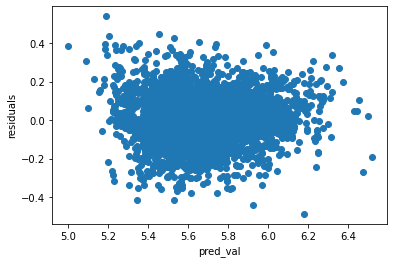

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     4230.
Date:                Wed, 10 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:34:51   Log-Likelihood:                 12300.
No. Observations:               17276   AIC:                        -2.458e+04
Df Residuals:                   17264   BIC:                        -2.448e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -35.1013      3.898     

In [40]:
model = linear_model(df2)
model

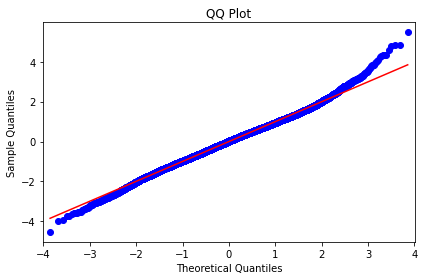

In [41]:

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='r', fit=True)
plt.title('QQ Plot')
plt.tight_layout()
plt.show()

Checklist
- [x] Normalization - log transformed
- [x] Homoscedasticity - residual and QQ plot close
- [x] Multicolinearity - each variable less than 10
- [x] Autocorrelation - Durbin-Watson~2
- [x] Residual Skewness - normal residual distribution ~ zero 
- [x] Kurtosis ~ 3

Overall, more reliable coefficients than David's multiple linear regression's coefficient due to residuals, however slightly less R-squared accuracy, difference of 0.027